# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []# Empty list for holding the latitude and longitude combinations

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
# Define your OpenWeatherMap API key
api_key = weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kerikeri
Processing Record 6 of Set 1 | rosetta
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | rio grande
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | chaohu
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | cable beach
City not found. Skipping...
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | car

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.49,75,86,16.56,TF,1714386883
1,blackmans bay,-43.0167,147.3167,8.07,62,14,0.45,AU,1714386883
2,iqaluit,63.7506,-68.5145,-10.15,67,75,2.06,CA,1714386884
3,ushuaia,-54.8000,-68.3000,-0.19,80,0,1.54,AR,1714386884
4,kerikeri,-35.2268,173.9474,14.39,91,78,1.96,NZ,1714386884


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.49,75,86,16.56,TF,1714386883
1,blackmans bay,-43.0167,147.3167,8.07,62,14,0.45,AU,1714386883
2,iqaluit,63.7506,-68.5145,-10.15,67,75,2.06,CA,1714386884
3,ushuaia,-54.8000,-68.3000,-0.19,80,0,1.54,AR,1714386884
4,kerikeri,-35.2268,173.9474,14.39,91,78,1.96,NZ,1714386884


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

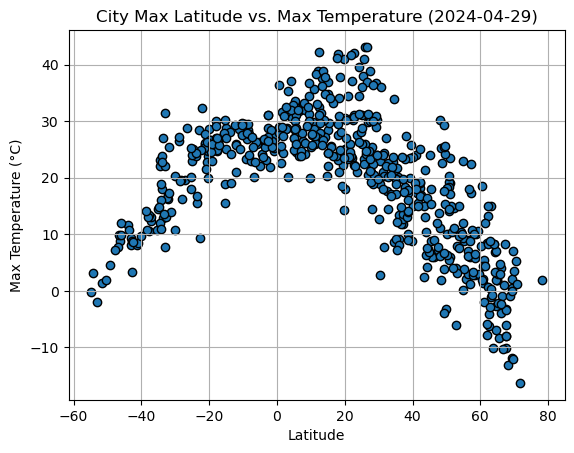

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Get the date when the weather data was retrieved
data_retrieval_date = datetime.utcfromtimestamp(city_data_df["Date"].min()).strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Max Temperature ({data_retrieval_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

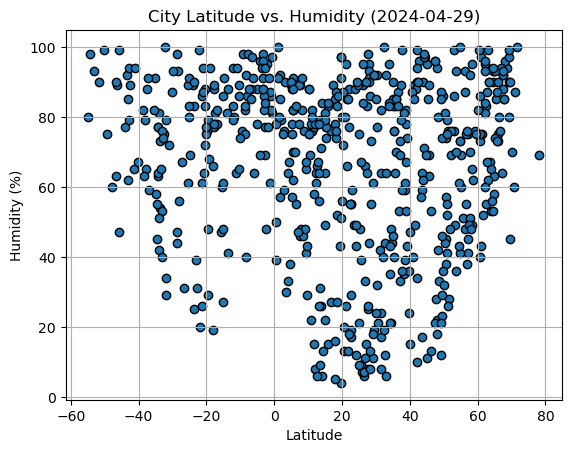

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Get the date when the weather data was retrieved
data_retrieval_date = datetime.utcfromtimestamp(city_data_df["Date"].min()).strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({data_retrieval_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

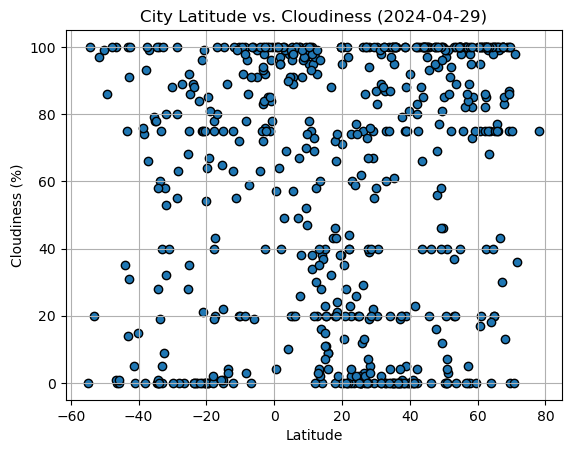

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Get the date when the weather data was retrieved
data_retrieval_date = datetime.utcfromtimestamp(city_data_df["Date"].min()).strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({data_retrieval_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

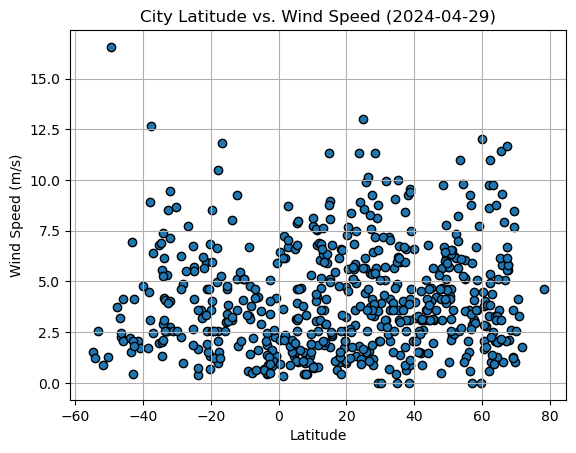

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Get the date when the weather data was retrieved
data_retrieval_date = datetime.utcfromtimestamp(city_data_df["Date"].min()).strftime("%Y-%m-%d")

# Incorporate the other graph properties
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({data_retrieval_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    # Calculate regression line
    regress_values = x_values * slope + intercept
   
    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Calculate coordinates for annotation
    x_range = x_values.max() - x_values.min()
    y_range = y_values.max() - y_values.min()
    x_coord = x_values.min() + x_range * 0.05

    # Calculate y-coordinate for annotation based on data density
    if slope > 0:
        # If the slope is positive, position annotation above the data points
        y_coord = y_values.max() - y_range * 0.05
    else:
        # If the slope is negative, position annotation below the data points
        y_coord = y_values.min() + y_range * 0.05
    
    # Annotate linear regression equation inside the plot area
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(x_coord, y_coord, line_eq, fontsize=15, color="red")
    
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
   
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,iqaluit,63.7506,-68.5145,-10.15,67,75,2.06,CA,1714386884
5,rosetta,31.4044,30.4164,21.09,64,2,5.73,EG,1714386885
6,yellowknife,62.4560,-114.3525,-4.13,83,40,4.92,CA,1714386885
9,udachny,66.4167,112.4000,-0.86,80,99,7.95,RU,1714386885
13,chaohu,31.6000,117.8667,20.24,82,98,3.10,CN,1714386625


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.49,75,86,16.56,TF,1714386883
1,blackmans bay,-43.0167,147.3167,8.07,62,14,0.45,AU,1714386883
3,ushuaia,-54.8000,-68.3000,-0.19,80,0,1.54,AR,1714386884
4,kerikeri,-35.2268,173.9474,14.39,91,78,1.96,NZ,1714386884
7,invercargill,-46.4000,168.3500,8.90,89,0,2.24,NZ,1714386885


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8288263997157427


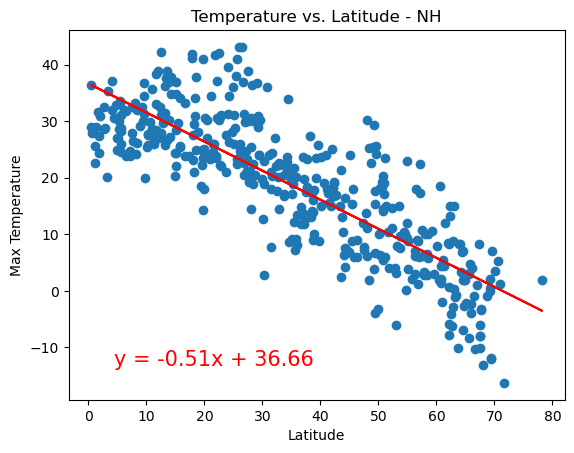

In [15]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# create Linear Regression plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Temperature vs. Latitude - NH")

The r-value is: 0.8077344808595981


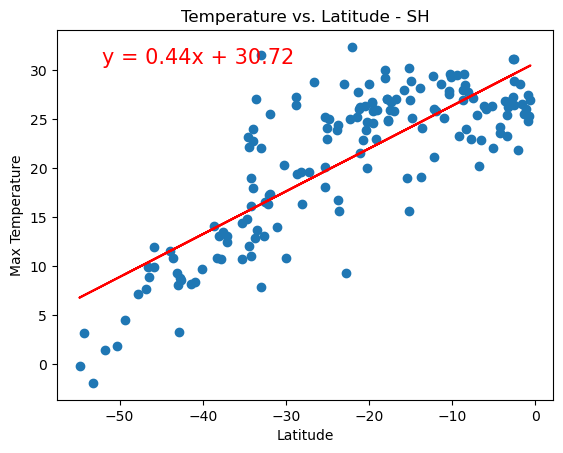

In [16]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Temperature vs. Latitude - SH")

**Discussion about the linear relationship:** 
The linear relationship between latitude and maximum temperature can be observed in the scatter plot and linear regression analysis. As latitude increases (moving towards the poles), the maximum temperature seems to be decreasing. This negative correlation is evident from the downward trend of the regression line, indicating that higher latitudes (closer to the poles) generally experience lower temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15180821534040542


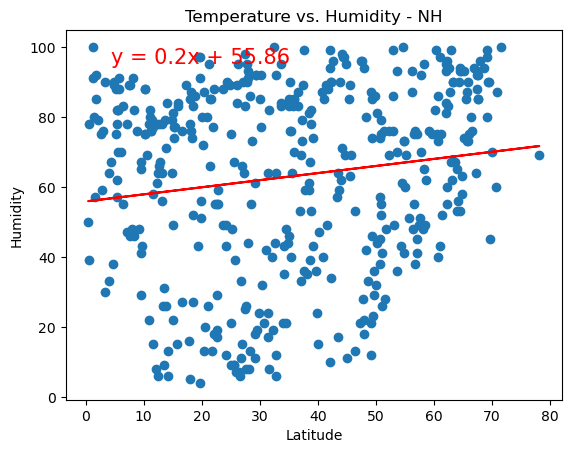

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Temperature vs. Humidity - NH")


The r-value is: 0.11786279078625748


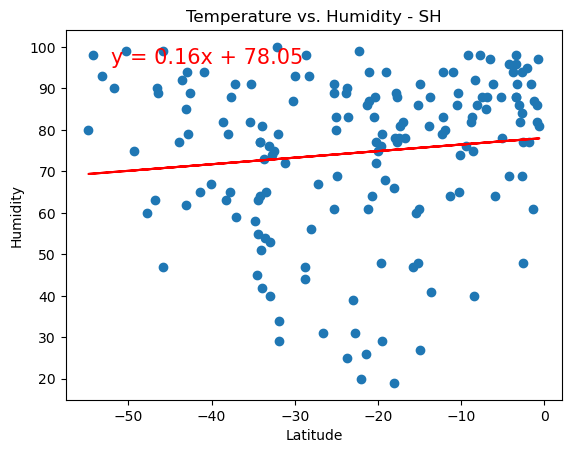

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Temperature vs. Humidity - SH")


**Discussion about the linear relationship:** 
The linear relationship between latitude and humidity in the Southern Hemisphere is not particularly strong, as indicated by the relatively low absolute value of the correlation coefficient (r-value).
The r-value suggests a slight negative correlation between latitude and humidity in the Southern Hemisphere, indicating that as you move towards higher latitudes (closer to the South Pole), humidity tends to decrease slightly. However, the correlation is not very strong, meaning that latitude alone may not be a reliable predictor of humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15351157036046495


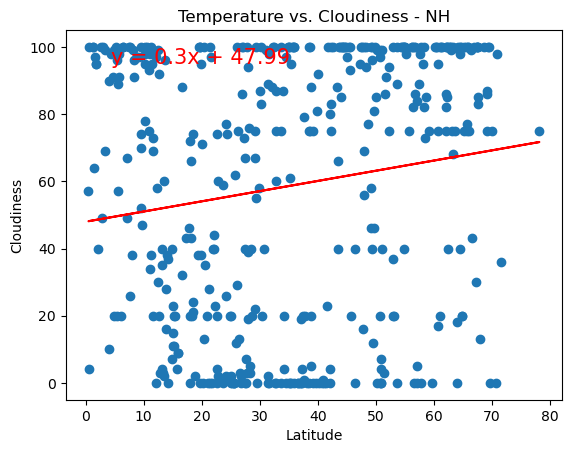

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Temperature vs. Cloudiness - NH")


The r-value is: 0.232474813792571


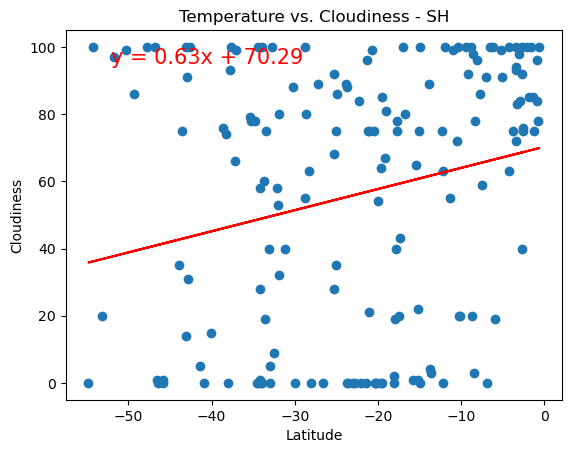

In [20]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Temperature vs. Cloudiness - SH")


**Discussion about the linear relationship:** 
The r-value close to zero suggests that there is little to no correlation between latitude and cloudiness in the Southern Hemisphere. This means that latitude alone may not be a reliable predictor of cloudiness levels in this region.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07213972207245407


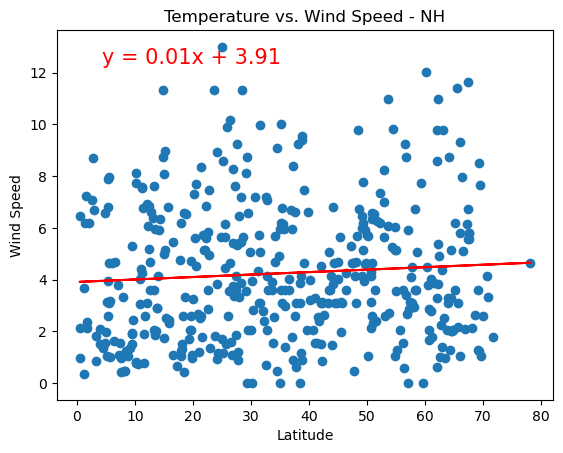

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Temperature vs. Wind Speed - NH")


The r-value is: -0.16220346691573895


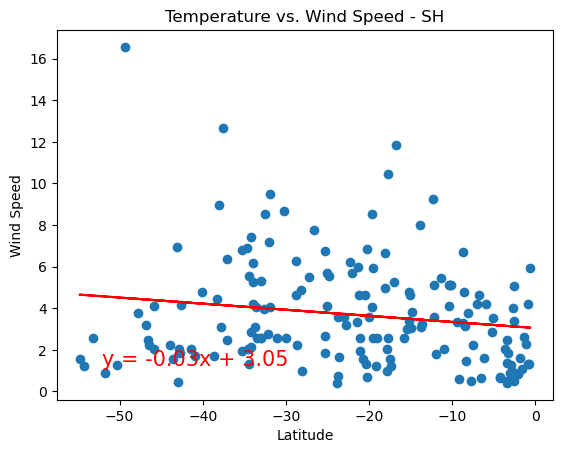

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Print the r-value
print(f"The r-value is: {rvalue}")

# The linear regression equation and line to plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Temperature vs. Wind Speed - SH")


**Discussion about the linear relationship:** 
The r-value close to zero suggests that there is little to no correlation between latitude and wind speed.